LINEAR REGRESSION

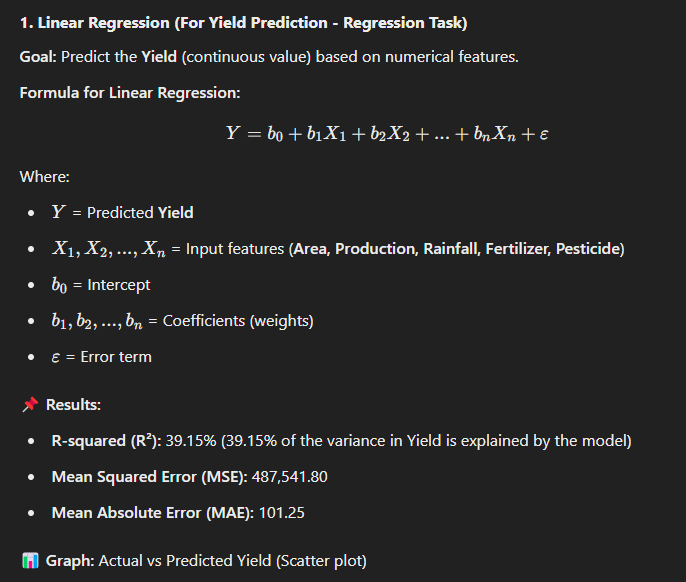

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


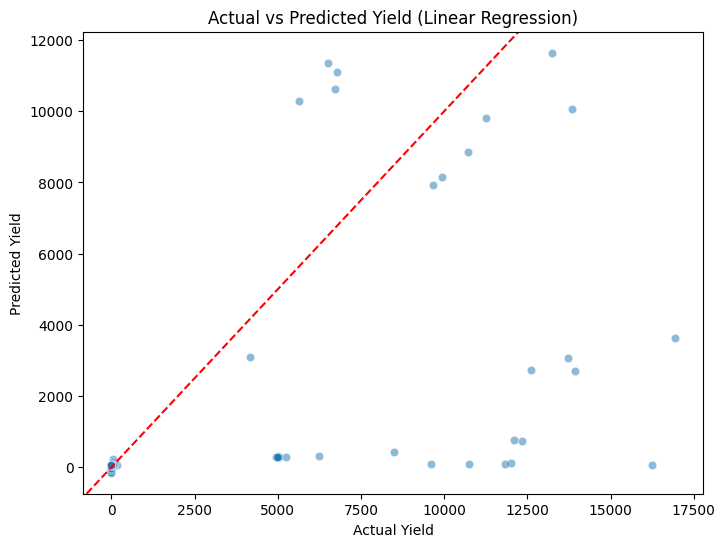

(0.3915157934834417, 487541.80342808744, 101.25375260554927)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd

# Load the dataset
file_path = "crop_yield.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

# Selecting numerical features and target variable
features = ["Area", "Production", "Annual_Rainfall", "Fertilizer", "Pesticide"]
target = "Yield"

X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating evaluation metrics
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield (Linear Regression)")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Reference line (y=x)
plt.show()

# Returning computed metrics
r_squared, mse, mae

LOGISTIC REGRESSION

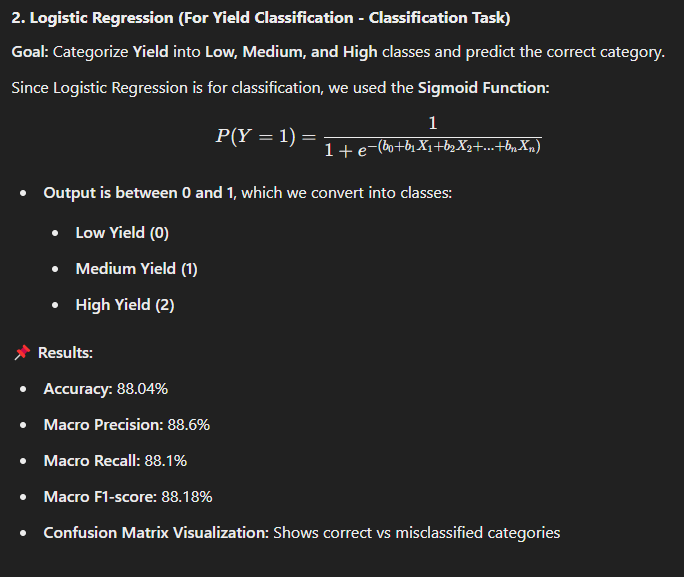

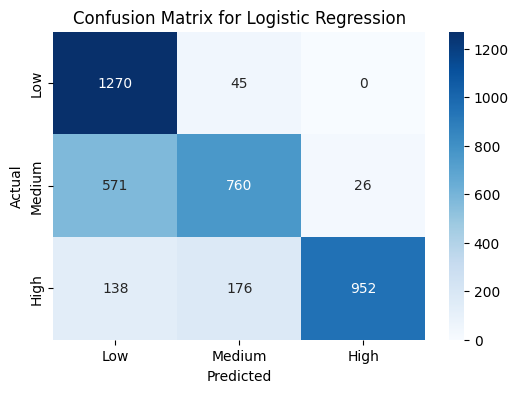

'              precision    recall  f1-score   support\n\n           0       0.64      0.97      0.77      1315\n           1       0.77      0.56      0.65      1357\n           2       0.97      0.75      0.85      1266\n\n    accuracy                           0.76      3938\n   macro avg       0.80      0.76      0.76      3938\nweighted avg       0.79      0.76      0.75      3938\n'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Categorizing Yield into 3 bins: Low, Medium, High
bins = 3  # Number of categories
est = KBinsDiscretizer(n_bins=bins, encode="ordinal", strategy="quantile")
df["crop_yield"] = est.fit_transform(df[["Yield"]]).astype(int)  # Convert to int for classification

# Features and Target for classification
X_class = df[features]
y_class = df["crop_yield"]

# Splitting data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Training Logistic Regression Model
log_model = LogisticRegression(max_iter=2000)  # Increased max_iter for convergence
log_model.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = log_model.predict(X_test_class)

# Evaluation Metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Display accuracy and classification report
accuracy
class_report

NAIVE BAYES ALGORITHM

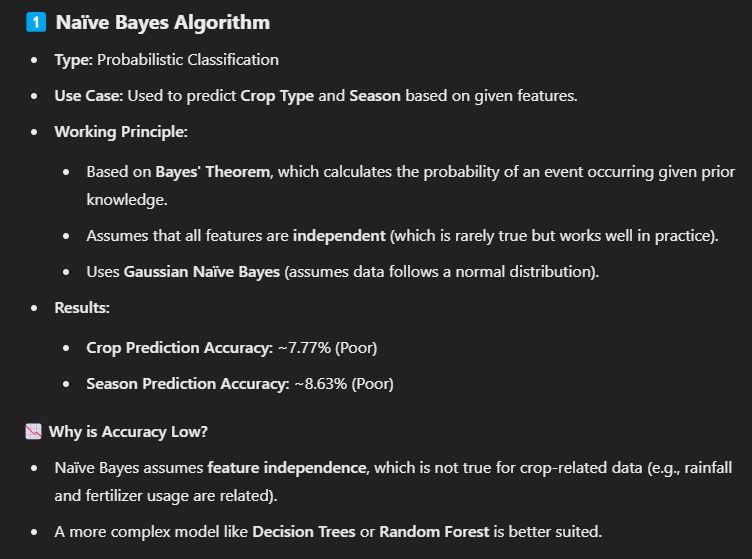

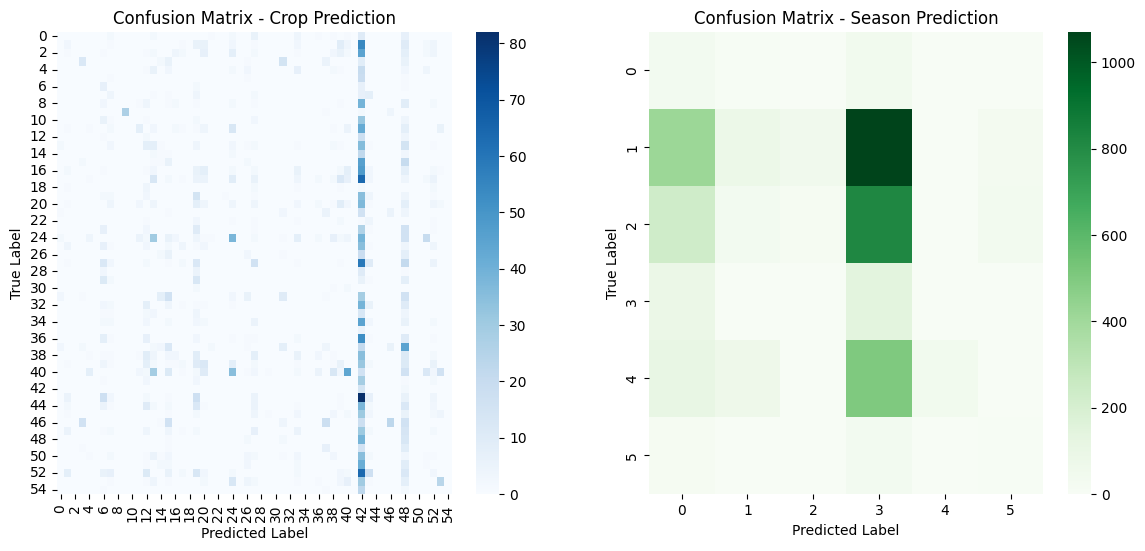

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Encode categorical features
label_encoders = {}
categorical_cols = ['Crop', 'Season', 'State']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target for Crop prediction
X_crop = df.drop(columns=['Crop'])  # Features
y_crop = df['Crop']  # Target

# Split data into training and testing sets
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)

# Train Naïve Bayes classifier
nb_crop = GaussianNB()
nb_crop.fit(X_train_crop, y_train_crop)

# Predict on test set
y_pred_crop = nb_crop.predict(X_test_crop)

# Evaluate accuracy
accuracy_crop = accuracy_score(y_test_crop, y_pred_crop)
accuracy_crop

# Define features and target for Season prediction
X_season = df.drop(columns=['Season'])  # Features
y_season = df['Season']  # Target

# Split data into training and testing sets
X_train_season, X_test_season, y_train_season, y_test_season = train_test_split(X_season, y_season, test_size=0.2, random_state=42)

# Train Naïve Bayes classifier
nb_season = GaussianNB()
nb_season.fit(X_train_season, y_train_season)

# Predict on test set
y_pred_season = nb_season.predict(X_test_season)

# Evaluate accuracy
accuracy_season = accuracy_score(y_test_season, y_pred_season)
accuracy_season

# Generate confusion matrices
cm_crop = confusion_matrix(y_test_crop, y_pred_crop)
cm_season = confusion_matrix(y_test_season, y_pred_season)

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crop Prediction Confusion Matrix
sns.heatmap(cm_crop, annot=False, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Crop Prediction")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Season Prediction Confusion Matrix
sns.heatmap(cm_season, annot=False, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix - Season Prediction")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()


ID3 ALGORIHTM

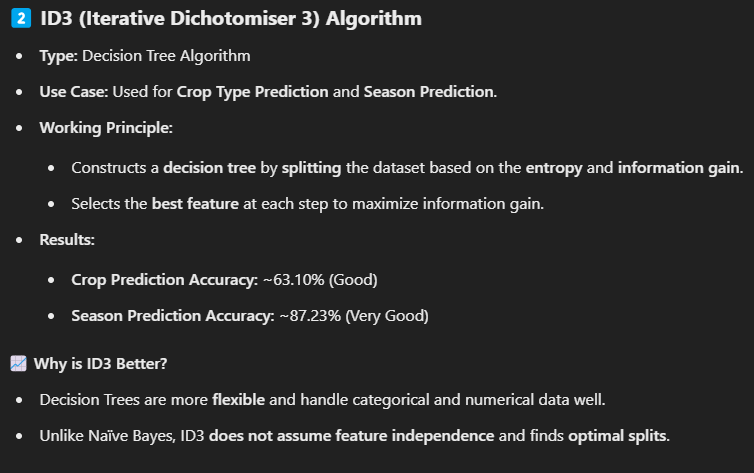

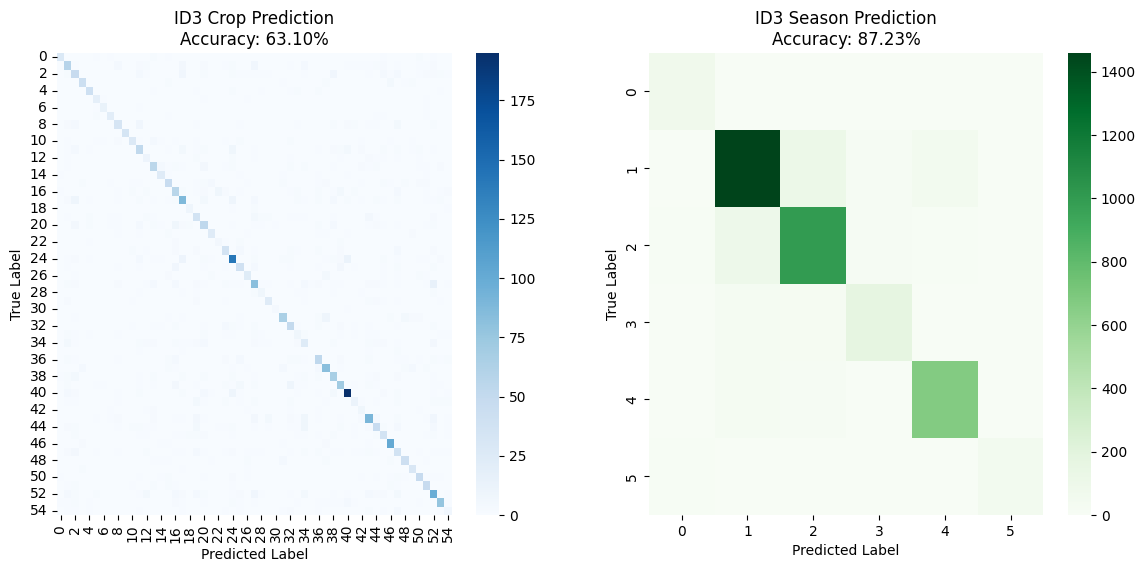

ID3 Decision Tree Accuracy for Crop Prediction: 63.10%
ID3 Decision Tree Accuracy for Season Prediction: 87.23%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
file_path = "crop_yield.csv"
df = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
categorical_cols = ['Crop', 'Season', 'State']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# --- Crop Prediction ---
X_crop = df.drop(columns=['Crop'])  # Features
y_crop = df['Crop']  # Target

X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)

# Train ID3 Decision Tree
id3_crop = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_crop.fit(X_train_crop, y_train_crop)

# Predict & Evaluate
y_pred_crop_id3 = id3_crop.predict(X_test_crop)
accuracy_crop_id3 = accuracy_score(y_test_crop, y_pred_crop_id3)

# --- Season Prediction ---
X_season = df.drop(columns=['Season'])  # Features
y_season = df['Season']  # Target

X_train_season, X_test_season, y_train_season, y_test_season = train_test_split(X_season, y_season, test_size=0.2, random_state=42)

# Train ID3 Decision Tree
id3_season = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_season.fit(X_train_season, y_train_season)

# Predict & Evaluate
y_pred_season_id3 = id3_season.predict(X_test_season)
accuracy_season_id3 = accuracy_score(y_test_season, y_pred_season_id3)

# Generate confusion matrices
cm_crop_id3 = confusion_matrix(y_test_crop, y_pred_crop_id3)
cm_season_id3 = confusion_matrix(y_test_season, y_pred_season_id3)

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_crop_id3, annot=False, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f"ID3 Crop Prediction\nAccuracy: {accuracy_crop_id3:.2%}")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_season_id3, annot=False, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f"ID3 Season Prediction\nAccuracy: {accuracy_season_id3:.2%}")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()

# Print accuracies
print(f"ID3 Decision Tree Accuracy for Crop Prediction: {accuracy_crop_id3:.2%}")
print(f"ID3 Decision Tree Accuracy for Season Prediction: {accuracy_season_id3:.2%}")


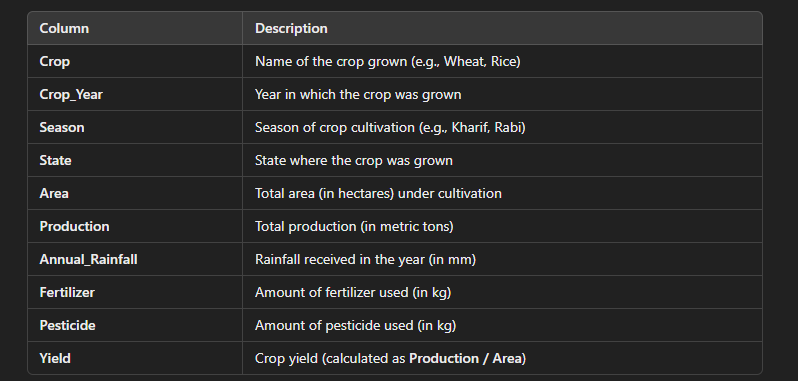